# Fine Wine

# Goal:

- Construct an ML Regression model that predicts wine quality using features of white and red wines.

- Find the key drivers of wine quality. 

- Deliver a report that explains what steps were taken, why and what the outcome was.

- Make recommendations on what works or doesn't work in predicting wine quality.

In [1]:
#standard DS imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import math
from math import sqrt
import random
from itertools import combinations

#sklearn and scipy imports
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from scipy.stats import ttest_1samp

#custom imports

import acquire as a
import prepare as p
import functions as f
import new_lib as nl

#filter out any noisy warning flags
import warnings
warnings.filterwarnings('ignore')

# setting the seed
seed = random.seed(123)

# Acquire

- Data acquired from (https://data.world/food/wine-quality) P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
    Modeling wine preferences by data mining from physicochemical properties.
    In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.
- It contained 6497 rows and 13 columns before cleaning
- Each row represents a white or red wine
- Each column represents information about the red or white wine
- A data dictionary is available in the README file on Fine Wine's Github

In [2]:
# Acquire Step
wine = a.acquire_wine()

# Prepare

Prepare Actions:  

The target variable changed from overal quality on a scale of 0-10 to good quality of 6 or better and lower quality wine as 5 or lower.  
Dropped unnecessary columns    
Placed underscores back in columns that were missing  
Dropped duplicate columns  
Created a scaled dataframe for modeling purposes with identified features:    
    - created dummies    
    - dropped columns    
    - scaled the data    
split the data    

In [3]:
# preparing and splitting data into train, validate, test splits
wine = p.prepare_wine(wine)
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = nl.train_vailidate_test_split(wine, 'quality')

## A brief look at the data

In [4]:
# Looking at the cleaned up columns
train.head()

,red_or_white,fixed_acidity,volatile_acidity,citric_acid,sugar,chlorides,free_sulfer,total_sulfer,density,pH,sulphates,alcohol,quality
3899,0,7.3,0.30,0.33,2.3,0.043,28.0,125.0,0.99084,3.34,0.44,12.6,7
5268,0,5.9,0.37,0.32,1.6,0.029,41.0,102.0,0.98916,3.41,0.55,12.7,7
332,1,8.0,0.58,0.28,3.2,0.066,21.0,114.0,0.99730,3.22,0.54,9.4,6
274,1,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,5
4326,0,6.5,0.17,0.31,1.5,0.041,34.0,121.0,0.99092,3.06,0.46,10.5,6


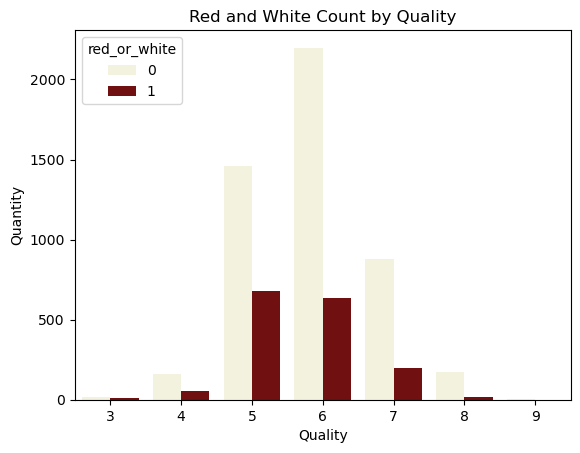

In [5]:
f.wine_view(wine)

### A look at the complete dataset by quality

# Explore

Questions asked:

    1) Does the quantity of alcohol effect the quality of the wine?
    
    2) Does the density of the wine effect the quality of the wine?
    
    3) Does the amount of sugar effect the quality of the wine?
    
    4) Does the acidity of the wine effect the quality of the wine?

## 1) Does the quantity of alcohol effect the quality of the wine?

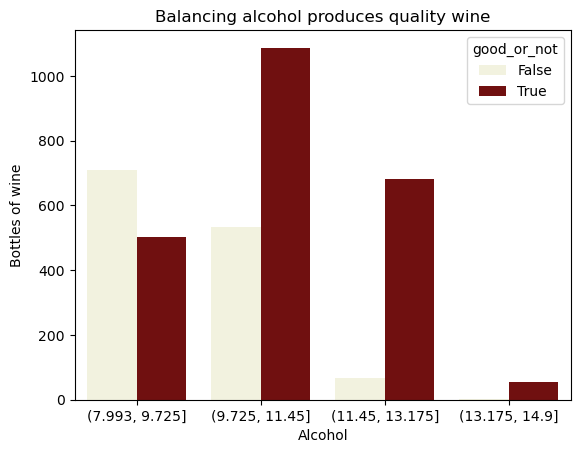

In [6]:
# Visualization for quantity of alcohol
alcohol = f.alcohol_visual(train)
alcohol

- Alcohol levels between 9.7 and 11.45 produced the most good wines.
- The least amount of good wines produced came from levels between 7.9 and 9.7.
- The highest content of alcohol shows the least amount of good wines; however, there are too little total quantities of wine to make an accurate observation.


H_0: Alchol content does not effect the quality of the wine.  

H_a: Alcohol content effects the quality of the wine.

In [7]:
# Running a one sample ttest statistical test 
#to check for correlation and have more confidence
alcohol_test = f.eval_result(train, 'alcohol')
alcohol_test

Reject the null hypothesis that alchol content does not effect the quality of the wine.
Sufficient evidence to move forward understanding that alcohol content effects the quality of the wine.


***Takeaway:***

The higer the content of alcohol, the more likely that the wine is selected as quality 6 or higher.

## 2)  Does the density of the wine effect the quality of the wine?

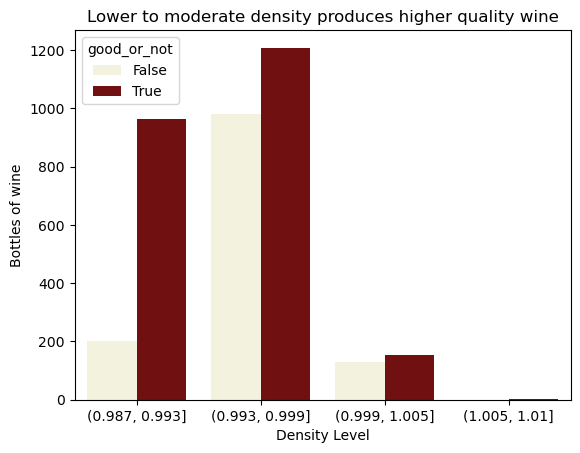

In [8]:
# Visualization to show how density effects the quality of the wine.
density = f.density_visual(train)
density

- Low to mid levels of density produced the most good quality wines.
- Very few wines were produced at the higer levels of density.

H_0: Density levels do not effect the quality of wine.   

H_a: Density levels effect the quality of wine.

In [9]:
# Running a one sample ttest statistical test 
#to check for correlation and have more confidence
density_test = f.eval_result2(train, 'density')
density_test

Reject the null hypothesis that density levels do not effect the quality of wine.  
Sufficient evidence to move forward understanding that density levels effect the quality of wine.


***Takeaway:***

The middle levels of density produce the most good wines, but a majority of the wines have low to mid levels of density.

## 3) Does the amount of sugar effect the quality of the wine?

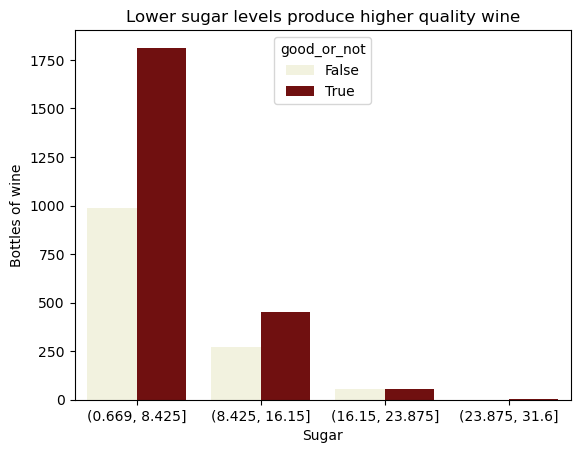

In [10]:
# Visualization to show how sugar effects the quality of the wine.
sugar = f.sugar_visual(train)
sugar

- The lowest levels of sugar by far produce the most good quality wines.
- Most of the wines produced contain the lowest levels of sugar.

H_0: Sugar has no effect on determining the quality of the wine.

H_a: The different levels of sugar effect the quality of the wine.

In [11]:
# Running a one sample ttest statistical test 
#to check for correlation and have more confidence
sugar_test = f.eval_result3(train, 'sugar')
sugar_test

Fail to reject the null
Insufficient evidence to reject the null


***Takeaway:***

Although the stats test failed to reject the null, the strong visualtion and clustering sugar with density produces sufficient evidence to include this feature in the model.

## 4) Does the acidity of the wine effect the quality of the wine?

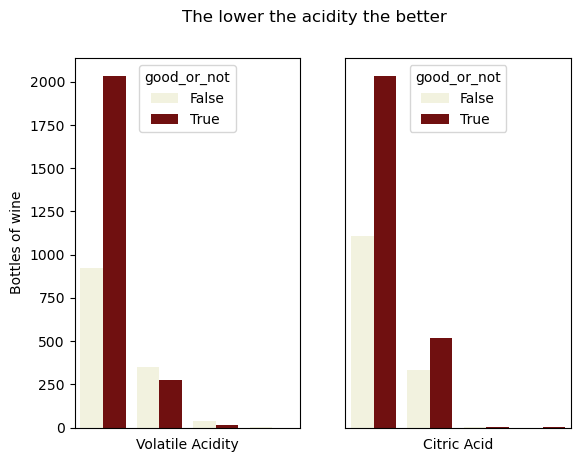

In [12]:
# Visualization to show how acidity levels effects the quality of the wine.
acidity = f.acidity_visual(train)
acidity

- Volatile acidity and citrtic acidity produced the most good wines at lower levels.
- As the acidity decreased the amount of good wines decreases as well.
- There is a significant drop off after .455 level of volatile acidity.
- There is a significant drop off after .415 level of citric acid.

H_0: The acidity level of wine does not effect the quality of the wine.  

H_a: The acidity level of wine effects the quality of the wine.

In [13]:
# Running a one sample ttest statistical test 
#to check for correlation and have more confidence
volatile_test = f.eval_result4(train, 'volatile_acidity')
volatile_test

Reject the null hypothesis that the acidity level of wine does not effect the quality of the wine.  
Sufficient evidence to move forward understanding that the acidity level of wine effects the quality of the wine.


In [14]:
# Running a one sample ttest statistical test 
#to check for correlation and have more confidence
citric_test = f.eval_result4(train, 'citric_acid')
citric_test

Reject the null hypothesis that the acidity level of wine does not effect the quality of the wine.  
Sufficient evidence to move forward understanding that the acidity level of wine effects the quality of the wine.


***Takeaway:***

The lower the acidity levels the more good quality wine that is produced.

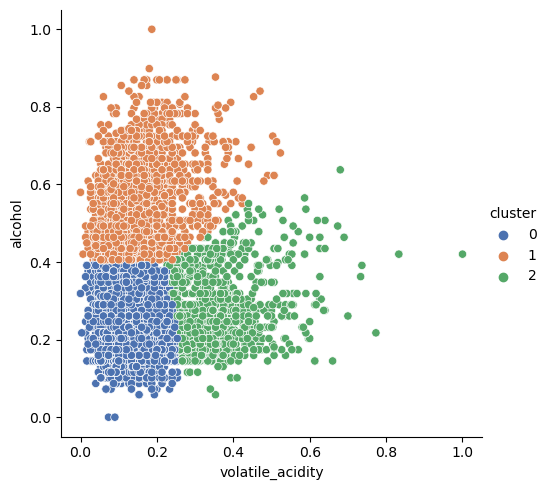

In [15]:
w = f.cluster_col(wine)
f.clusters(w, 'volatile_acidity', 'alcohol')

# Exploration Summary

- Alcohol has the strongest correlation with the quality of wines that are rated at six or above.
- The acidity of the wine at lower levels has the next higest correlation with good wines.
- The density of the wine has the strongest negative correlation.
- Although sugar failed to reject the null hypothesis, combining this feature with density produced a strong visualization that could produce enhanced results in the model.
- All of the features appear to have lower correlations with the quality of the wine, especially wines rated at six or higher. Clustering these features may produce better results.

# Features I am moving to modeling with

- Volatile acidity and alcohol
- Density and alcohol
- Sugar and Density
- Citric and Volatile Acidity
- These are the clusters that produced the strongest visualizations to move forward with

# Features I'm not moving to modeling with

- Total sulfer, PH, and sulphates all failed to reject the null hypothesis and do not appear to have a significant impact on the quality of the wine.

# Modeling

- The mode on train will be the baseline I use for this project
- I will be evaluating models developed using four different model types and various hyperparameter configurations 
- Models will be evaluated on train and validate data 
- The model that performs the best will then be evaluated on test data. 
- The Decision Tree model produced the best results.

In [16]:
# creating the scaled dataframe with clustered features
scaled_df = f.wine_df_scaled(wine)

In [17]:
# splitting data into train, validate, test splits
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = nl.train_vailidate_test_split(scaled_df, 'is_good')

In [18]:
# Start with the baseline
train['baseline'] = 1
round((len(train.is_good[train.is_good == 1])/len(train))*100, 2)

63.95

# KNN Model

In [19]:
# calling the function for the knn model
knn_model_train_val = f.knn_model(X_train, y_train, X_val, y_val)
knn_model_train_val

(70.47, 70.19)

- KNN model performed better than the baseline on train and validate

# Random Forrest Model

In [20]:
# Calling the function for the random forrest model
rf_model_train_val = f.rf_model(X_train, y_train, X_val, y_val)
rf_model_train_val

(71.05, 70.96)

- Random Forrest performed better than the baseline on train and validate.

# Decision Tree Model

In [21]:
# Calling the function for the decision tree model
dt_model_train_val = f.dt_model(X_train, y_train, X_val, y_val)
dt_model_train_val

(71.1, 71.09)

- Decision Tree Model performed better than the baseline on train and validate.

# Comparing Models

- All three models performed better than the baseline on train and validate.
- All three of the models were similar in their prediction accuracies and could move forward with any of the models, however decision tree and random forest performed slightly better than knn.
- I have chosen to move forward with the Decision Tree model because it performed better on validate than random forrest.

# Decsion Tree on Test

Accuracy is:  71.62


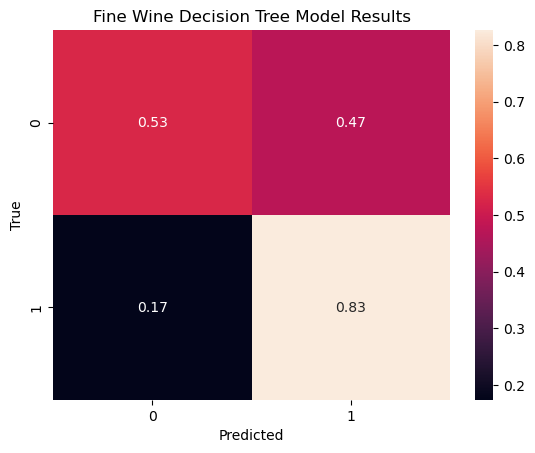

In [22]:
# Calling the function for the Decision Tree test model
dt_model_test = f.dt_model_test(X_test, y_test, X_train, y_train)
dt_model_test

The Decision Tree model performs better than baseline on test with an accuracy of 71% compared to the baseline with 64%.

The model correctly predicts good wines with 83% accuracy and bad wines with 53% accuracy

## Modeling Summary

- All three of the models performed better than the baseline on train and validate.
- A Decision Tree model was selected as the final model and performed better than the baseline.

# Conclusions

## Exploration

- The higer the content of alcohol, the more likely that the wine is selected as quality 6 or higher.

- The middle levels of density produce the most good wines, but a majority of the wines have low to mid levels of density.

- Although the stats test failed to reject the null, the strong visualtion and clustering sugar with density produces sufficient evidence to include this feature in the model.

- The lower the acidity levels the more good quality wine that is produced.

# Modeling

***The final model outperformed the baseline. Possible reasons include:***

- Setting the quality of "good" wines at six or above provided the sufficient amount of data to make more accurate predictions on the final database.
- The features that were included and clustering those features strengthened the final models and may have increased the efficiency of the final test model.

# Recommendations 

- Alcohol content is key to the quality of the wine and should be kept above 9.725% to increase the quality of the wine.
- The acidity level of the wine should be lower to increase the quality of the wine.
- Sugar and density should be lower to increase the quality level of the wine.

# Next Steps

- Looking at what features drive lower wine quality could provide some useful insights into what to avoid when trying to produce higher quality wine.
- More data on the region of where the wine is produced, the price of the wine, and what types of grapes are used could be useful in determining the quality of the wine.